## **Jobsheet 11 | Pertemuan 11**
## **Convolutional Neural Network (CNN)**

---

>### Data Mahasiswa
><p>Nama : Ahmad Bima Tristan Ibrahim<p>
>Kelas : 3F<p>
>Nim : 2141720077<p>
>Prodi : D-IV Teknik Informatika<p>
>Jurusan : Teknologi Informasii<p>

----

### **TUGAS**

- **Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.**
- **Buatlah model CNN untuk klasifikasi dataset MNIST.**
----

### **Jawab**

**Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.**<p>

**Lakukan Import Library**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

**Lakukan Load Data**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasikan nilai piksel menjadi antara 0 dan 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 16s 0us/step


**Sample Image**

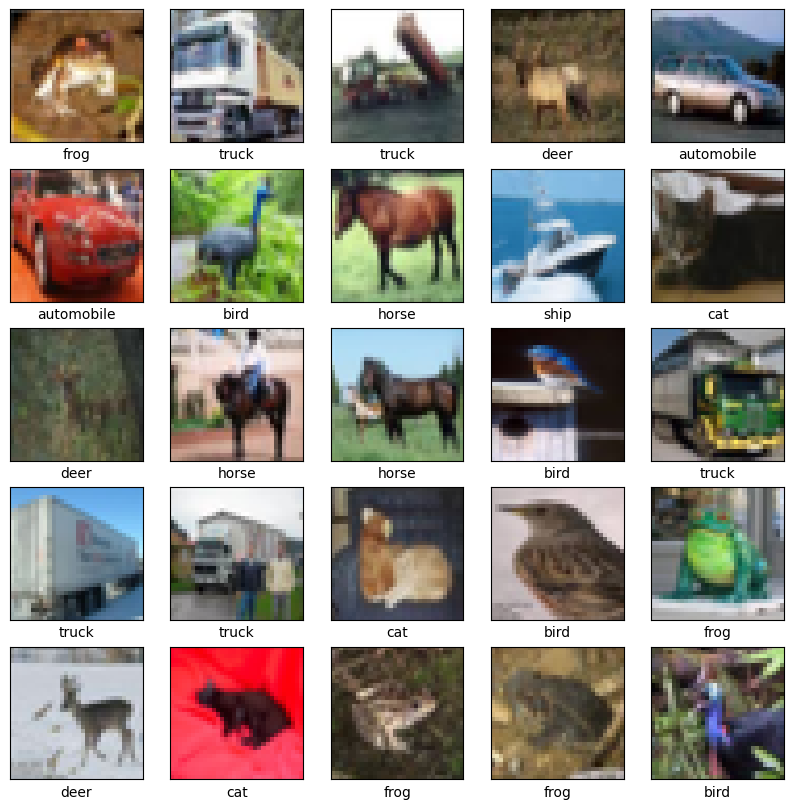

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
       'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Lakukan pembuatan Model CNN**

In [ ]:
# Model definition
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - 32s 10ms/step - loss: 3.0109 - accuracy: 0.2954 - val_loss: 2.3744 - val_accuracy: 0.4374
Epoch 2/100
1563/1563 [==============================] - 14s 9ms/step - loss: 2.5121 - accuracy: 0.4033 - val_loss: 2.1800 - val_accuracy: 0.4937
Epoch 3/100
1563/1563 [==============================] - 15s 9ms/step - loss: 2.2826 - accuracy: 0.4643 - val_loss: 2.0202 - val_accuracy: 0.5420
Epoch 4/100
1563/1563 [==============================] - 15s 9ms/step - loss: 2.1118 - accuracy: 0.5019 - val_loss: 1.9272 - val_accuracy: 0.5598
Epoch 5/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.9675 - accuracy: 0.5369 - val_loss: 1.8282 - val_accuracy: 0.5820
Epoch 6/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8423 - accuracy: 0.5616 - val_loss: 1.6784 - val_accuracy: 0.6065
Epoch 7/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.7247 - accuracy: 0.5854 - val_loss: 1.5237 

**Cek Arsitektur Konvolusi**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        2

**Evaluasi Model**

313/313 - 1s - loss: 0.6929 - accuracy: 0.8114 - 838ms/epoch - 3ms/step


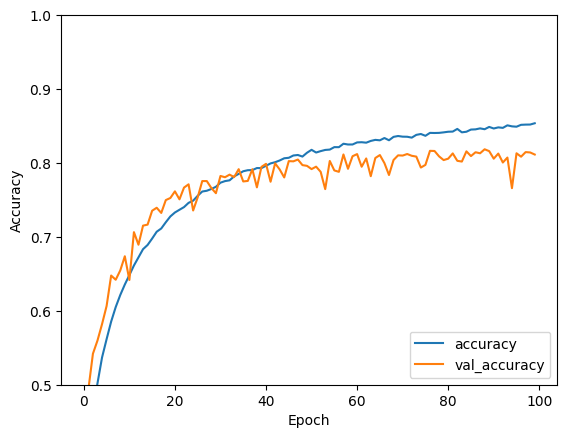

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

**Cek Hasil Akurasi**

In [ ]:
print("Akurasi: {:.2%}".format(test_acc))

Akurasi: 81.14%


-----

### **Jawab**

**Buatlah model CNN untuk klasifikasi dataset MNIST.**<p>

**Lakukan Import Library**


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


**Memuat dataset MNIST**

In [5]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Normalisasi gambar ke rentang [0, 1]**

In [6]:

train_images, test_images = train_images / 255.0, test_images / 255.0

**Mengonversi label ke format one-hot encoding**

In [7]:

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


**Menampilkan informasi tentang dataset**

In [8]:

print("Jumlah data latihan:", len(train_images))
print("Jumlah data pengujian:", len(test_images))
print("Ukuran gambar:", train_images[0].shape)

Jumlah data latihan: 60000
Jumlah data pengujian: 10000
Ukuran gambar: (28, 28)


**Membangun model**

In [9]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))



**Mengompilasi model**

In [10]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Melatih model**

In [11]:

history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2, validation_split=0.3)

Epoch 1/10
329/329 - 44s - loss: 0.3658 - accuracy: 0.8878 - val_loss: 0.0842 - val_accuracy: 0.9744 - 44s/epoch - 133ms/step
Epoch 2/10
329/329 - 37s - loss: 0.0995 - accuracy: 0.9703 - val_loss: 0.0601 - val_accuracy: 0.9811 - 37s/epoch - 112ms/step
Epoch 3/10
329/329 - 38s - loss: 0.0681 - accuracy: 0.9796 - val_loss: 0.0635 - val_accuracy: 0.9814 - 38s/epoch - 116ms/step
Epoch 4/10
329/329 - 36s - loss: 0.0548 - accuracy: 0.9839 - val_loss: 0.0434 - val_accuracy: 0.9867 - 36s/epoch - 110ms/step
Epoch 5/10
329/329 - 37s - loss: 0.0430 - accuracy: 0.9873 - val_loss: 0.0490 - val_accuracy: 0.9857 - 37s/epoch - 113ms/step
Epoch 6/10
329/329 - 35s - loss: 0.0365 - accuracy: 0.9891 - val_loss: 0.0435 - val_accuracy: 0.9871 - 35s/epoch - 107ms/step
Epoch 7/10
329/329 - 48s - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0417 - val_accuracy: 0.9884 - 48s/epoch - 147ms/step
Epoch 8/10
329/329 - 38s - loss: 0.0272 - accuracy: 0.9917 - val_loss: 0.0410 - val_accuracy: 0.9888 - 38s/epoch - 117

**Plot Visualisasi**

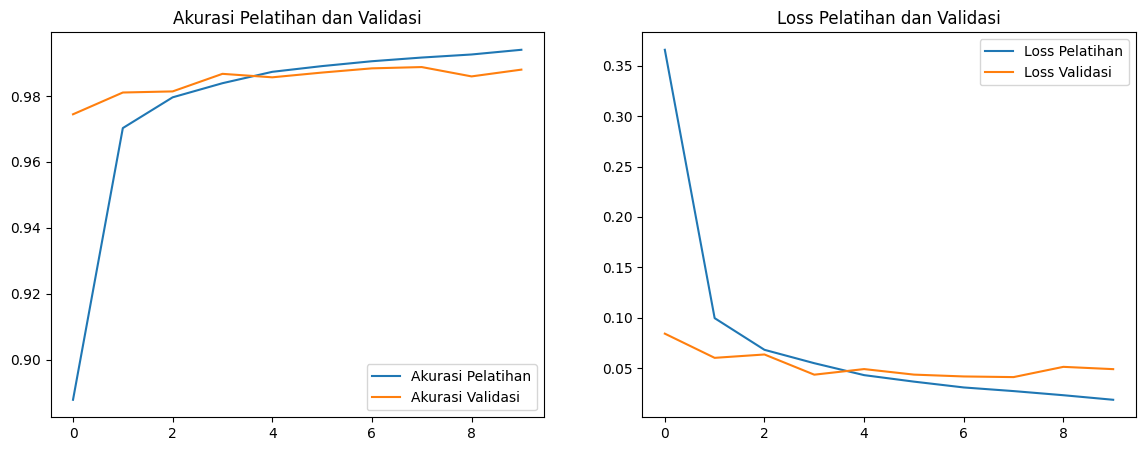

In [12]:

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()


**Evaluasi model pada kumpulan data uji**

In [15]:

validation_loss, validation_accuracy = model.evaluate(test_images, test_labels, verbose=False)
print("Loss Validasi:", validation_loss)
print("Akurasi Validasi:", validation_accuracy)

Loss Validasi: 0.035846225917339325
Akurasi Validasi: 0.9904999732971191


**Menghasilkan nilai prediksi pada kumpulan data uji**

In [14]:

y_pred_enc = model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


**Mendekode nilai prediksi**

In [16]:

y_pred = [np.argmax(i) for i in y_pred_enc]

**Menampilkan laporan klasifikasi**

In [17]:

print(classification_report(np.argmax(test_labels, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Membuat matriks konfusi dan menampilkannya dengan heatmap**

Text(58.222222222222214, 0.5, 'Aktual')

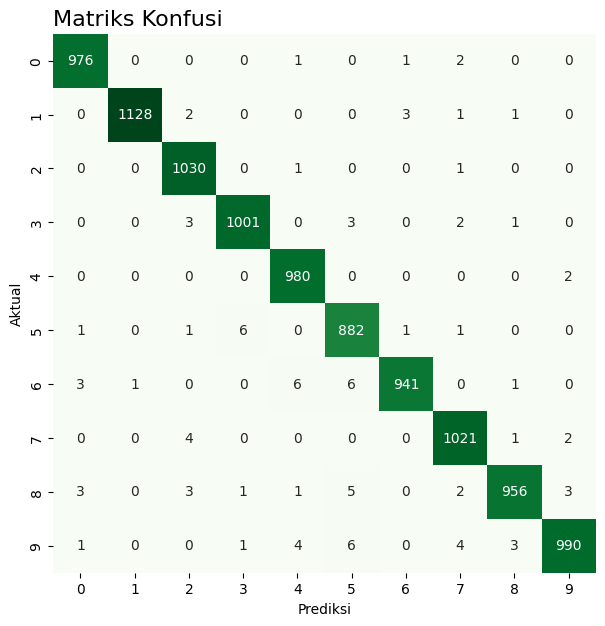

In [24]:

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(np.argmax(test_labels, axis=1), y_pred), annot=True, cbar=False, fmt='1d', cmap='Greens', ax=ax)
ax.set_title('Matriks Konfusi', loc='left', fontsize=16)
ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')


**Menampilkan target yang diprediksi pada setiap gambar**
(label di atas gambar adalah label yang diprediksi)

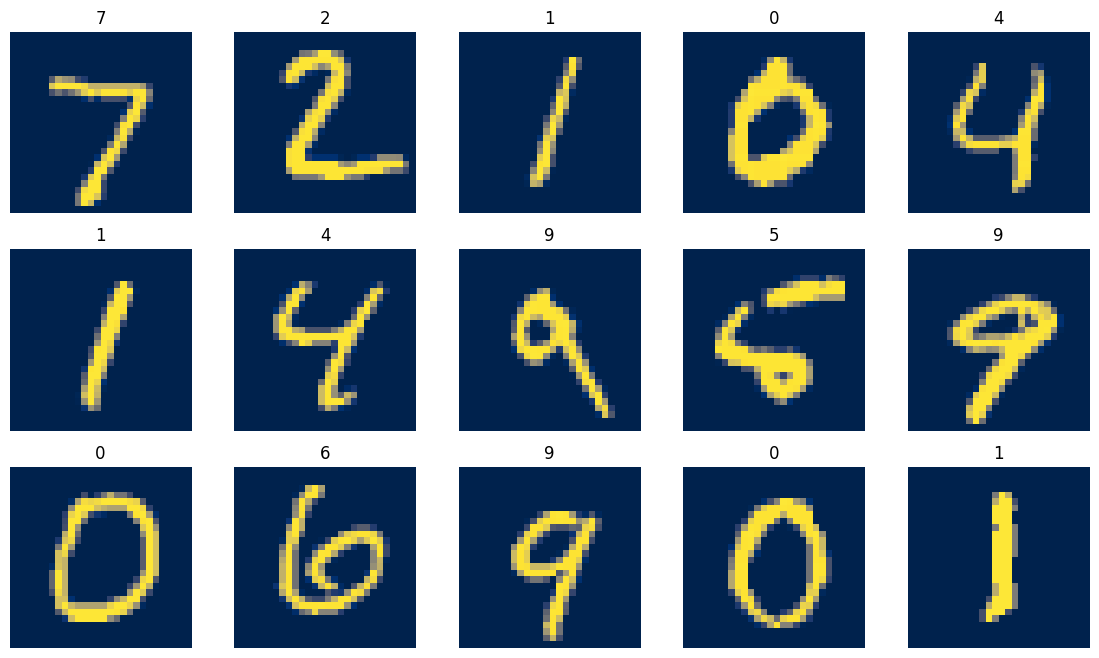

In [25]:

plt.figure(figsize=(14, 8))
for ind, row in enumerate(test_images[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')